In [ ]:
%load_ext autoreload
%autoreload 2

# Baseline
> Conv model

In [ ]:
from fastai2.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [ ]:
PATH = Path.cwd().parent/'data/UCF-101-frames'
Path.BASE_PATH = PATH.parent

In [ ]:
files = get_sequence_paths(PATH)

In [ ]:
def get_dls(image_size, seq_len, bs=4):
    "get ImageTuple dataloader"
    block = get_block(image_size, seq_len)
    return block.dataloaders(files, bs=bs)

In [ ]:
seq_len = 20
dls = get_dls(64, seq_len, bs=64)

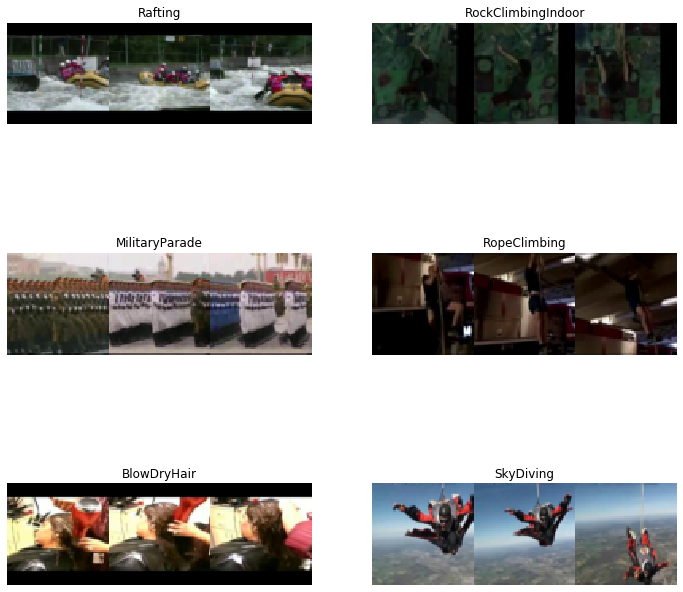

In [ ]:
dls.show_batch()

In [ ]:
model = SimpleModel(num_classes=dls.c, seq_len=seq_len)

In [ ]:
learn = Learner(dls, model, metrics=[accuracy], wd=0.1, splitter=simple_splitter).to_fp16()
learn.freeze()

SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=0.009120108559727669)

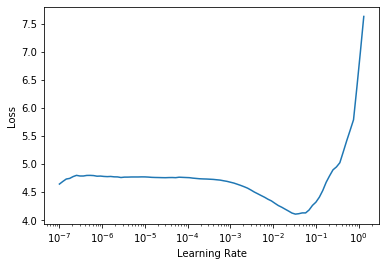

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.575414,2.761868,0.421171,04:40
1,1.740532,1.296505,0.684685,04:37
2,0.987968,0.812345,0.787162,04:37
3,0.612910,0.573114,0.846847,04:37
4,0.414406,0.462745,0.878003,04:37
5,0.288768,0.414240,0.890015,04:37
6,0.204575,0.349458,0.906156,04:37
7,0.141610,0.320319,0.914414,04:37
8,0.103294,0.312166,0.918544,04:38
9,0.088991,0.306993,0.917417,04:38


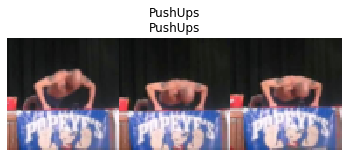

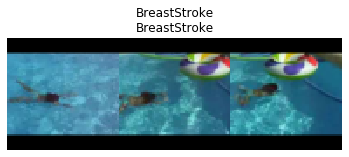

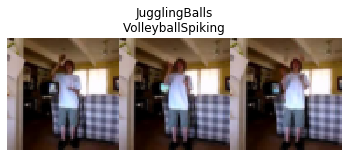

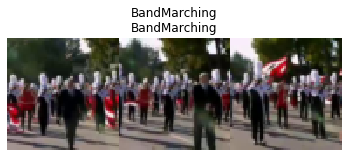

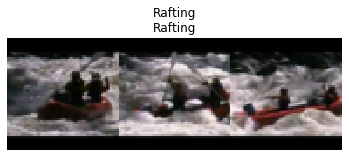

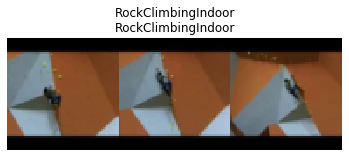

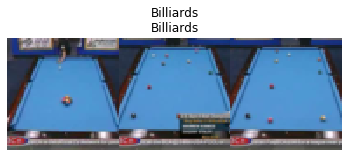

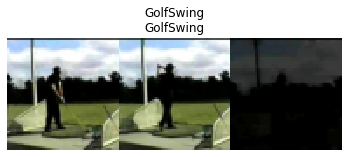

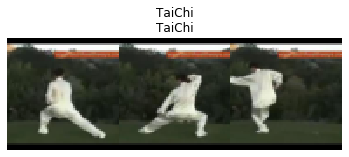

In [ ]:
learn.show_results()